# 予算配分について

Ryo Ikota (Jan. 14th, 2022)

10兆円の大学ファンドなるものがあるらしいので、予算配分について簡単な考察をしてみた。
目的は **予算の極端な集中配分は効果的ではない可能性がある** ことを示すことである。
初等的なミクロ経済学の教科書（大学1、2年生レベル）に載っていそうな内容と思われるが、自分はその辺りよく知らない。
経済学教授の目に留まると不可の成績を頂戴するのかも知れない。

## 準備

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

## 予算と研究成果の量についての仮定

ある大学の予算を1000倍にすれば研究成果も1000倍になるかというと、そんなことはないだろう（**収穫逓減**）。どこかで頭打ちになるはずだ。
そこで、予算 $x$ を与えられた時の研究成果の量 $f(x)$ を

$$
f(x) = \frac{c x}{1+x}
$$

とおく。ここで $c$ は正のパラメータ。上に凸な関数ならどれでも同じような結果になるだろう。パラメータが $c=1$ の時の関数 $f(x)$ のグラフは以下の通り：

In [2]:
def f(x, c=1):
    return c * x / (1 + x)

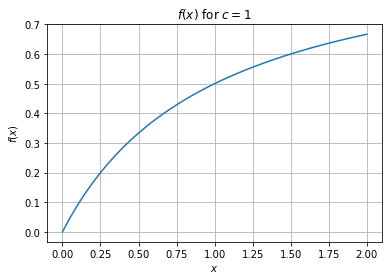

In [3]:
xn = np.linspace(0., 2., 41)
yn = f(xn)

plt.plot(xn, yn)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.title(r"$f(x)$ for $c=1$")
plt.grid(True);

ここではA大学とB大学の間で総予算 $Y$ を分け合うものとする（大学の数が $N$ 個でも同様の結果が成り立つだろう）。
総額 $Y$ のうち $m$ がA大学に配分されるものとする。A大学は $c=2$, B大学は $c=1$ とする。
つまり、 **同じ予算があるならA大学はB大学よりも2倍の成果を出す** と仮定する。

この時、 **A大学にほとんどの予算を割り振るのが効果的に思える人もいるかも知れないが、そうとも限らない** ことを示す。

## 最適な配分の計算

以上の仮定から、二つの大学の研究成果の合計は

$$
Q(m, Y) = f(m, 2) + f(Y-m,1),  \qquad (0 \leq m \leq Y)
$$

となる。

簡単な計算から、 $Y$ が与えられた時に $Q(m,Y)$ を最大化する $m=m_{\rm opt}$ は次式で与えられる：

$$
m_{\rm opt} = 
\begin{cases}
Y & {\text for} \; 0 \leq Y \leq \sqrt{2} - 1\\
- \sqrt{2} Y + 2 Y - 2 \sqrt{2} + 3  \qquad & {\text for}\; Y \geq \sqrt{2} - 1 
\end{cases}
$$

総額を $Y=6$ とした時の $Q(m,Y)$ のグラフは以下の通りで、 $m_{\rm opt} \neq Y$, つまりA大学だけに全ての予算を割り当てることは最適ではない。

In [4]:
def Q(m,Y):
    return f(m,2) + f(Y - m, 1)

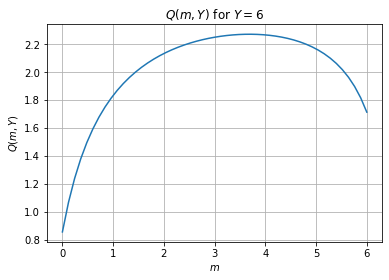

In [5]:
Y_sample = 6.0
m_sample = np.linspace(0., Y_sample, 51)
Q_sample = Q(m_sample, Y_sample)
plt.plot(m_sample, Q_sample)
plt.xlabel(r"$m$")
plt.ylabel(r"$Q(m, Y)$")
plt.title(r"$Q(m,Y)$ for $Y=6$")
plt.grid(True);

総額 $Y$ を横軸にした時の最適なA大学への予算配分率 $m_{\rm opt}/Y$ のグラフは以下の通りで、$m_{\rm opt}/Y \rightarrow 2 - \sqrt{2} \simeq 0.586$ に漸近する。

In [6]:
def mopt(Y):
    Y = np.asarray(Y)
    sqrt2 = np.sqrt(2)
    return np.where(Y < sqrt2 - 1.0, Y, -sqrt2*Y + 2.0*Y - 2*sqrt2 + 3.0)

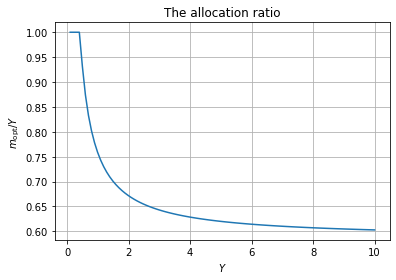

In [7]:
Yn = np.linspace(0.1, 10.0, 101) # starting at 0.1 to avoid dividing by zero.
plt.plot(Yn, mopt(Yn)/Yn)
plt.xlabel(r"$Y$")
plt.ylabel(r"$m_{\rm opt}/Y$")
plt.title("The allocation ratio")
plt.grid(True);

配分が最適である時の二大学の合計の研究成果のグラフは以下の通り：

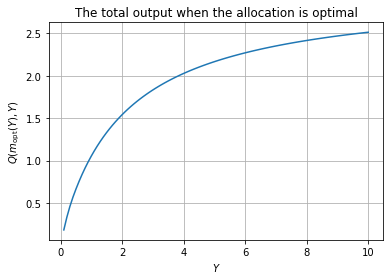

In [8]:
Qopt_np = Q(mopt(Yn), Yn)
plt.plot(Yn, Qopt_np)
plt.xlabel(r"$Y$")
plt.ylabel(r"$Q(m_{\rm opt}(Y), Y)$")
plt.title("The total output when the allocation is optimal")
plt.grid(True);

## 結語

以上の考察は極めてシンプルなもので、現実はこれほど単純ではないだろうが、一つの示唆を与える。
それは、**収穫逓減があれば投資の極端な選択と集中は非効率である可能性がある**ということだ。

選択と集中が望ましくないと考えられる理由は他にもある。選択と集中はギャンブルであり、ミクロのレベルで行うべきで、マクロのレベルで行うべきではない。
例えば、国全体の経済からすれば企業はミクロな存在であり、それぞれの企業が経営判断によって選択と集中を行った場合、成功して成長する企業もあれば失敗して大きな損失を被る企業もあるだろう。しかしながらそういったランダムネスは国全体のレベルではランダムさが互いに打ち消しあって（**大数の法則**）、マクロなレベルではギャンブル性は薄れるだろう。他方、国全体の大学研究の予算を選択集中した場合は失敗した場合の損失は極めて大きなものになる。企業というミクロの視点で国というマクロな存在の政策を考えることは慎むべきではなかろうか。

## 付録（SymPyによる計算）

In [9]:
sy.var('Y m', real=True)

(Y, m)

In [10]:
dQdm = sy.diff(Q(m,Y),m)
dQdm

-2*m/(m + 1)**2 + (Y - m)/(Y - m + 1)**2 - 1/(Y - m + 1) + 2/(m + 1)

In [11]:
m1, m2 = sy.solve(dQdm, m)

In [12]:
m1

-sqrt(2)*Y + 2*Y - 2*sqrt(2) + 3

In [13]:
m2

sqrt(2)*Y + 2*Y + 2*sqrt(2) + 3

$0 \leq m \leq Y$ であるから m1 が解。

In [14]:
Y0, = sy.solve(m1 - Y, Y)
Y0

-1 + sqrt(2)

In [15]:
Qopt = Q(m1,Y).simplify()
Qopt

(-12*Y + 9*sqrt(2)*Y - 24 + 17*sqrt(2))/(-4*Y + 3*sqrt(2)*Y - 8 + 6*sqrt(2))

In [16]:
sy.limit(Qopt, Y, sy.oo)

3